<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 9.1: NN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- **NOTE**: This is a Regression problem. Consider the appropriate:
    - Activation function
    - Loss/Cost Function
    - Metrics

### Import libraries

In [2]:
# insert code here

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
print("Keras version: ", keras.__version__)
print("Tensorflow version: ", tf.__version__)

Keras version:  3.8.0
Tensorflow version:  2.18.0


In [4]:
## Import libraries
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input

### Load data
Load the Diabetes dataset from **SciKit-Learn**.

In [5]:
# insert code here
diabetes = load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

### Prepare input data

In [6]:
# insert code here

# input
X = diabetes.data

# print the type of X to check that it is a numpy array
print("X is a ", type(X))

# Print shape to check rows and columns
print("X has {} rows and {} columns".format(X.shape[0], X.shape[1]))

# Save number of columns as n_cols
n_cols = X.shape[1]

# output
y = diabetes.target

print("First 10 values in y: ", y[:10])

X is a  <class 'numpy.ndarray'>
X has 442 rows and 10 columns
First 10 values in y:  [151.  75. 141. 206. 135.  97. 138.  63. 110. 310.]


### Split the data (training/test)

In [7]:
# insert code here
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.3,
    random_state = 65)

### Create the model's architecture

In [15]:
# insert code here
model = Sequential()

In [16]:
model.add(Input(shape=(n_cols,)))
# Add the first hidden layer
model.add(Dense(15, activation = 'relu'))
# Add the second hidden layer
model.add(Dense(5, activation = 'relu'))
# Add the output layer
model.add(Dense(1, activation = 'linear'))

In [17]:
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 15)             │           165 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 251 (1004.00 B)

 Trainable params: 251 (1004.00 B)

 Non-trainable params: 0 (0.00 B)

None


### Compile the model

In [18]:
# insert code here
model.compile(
    optimizer = 'adam',
    loss = 'mse',
    metrics = ['mse'])

### Fit the training data

In [19]:
%%time
# insert code here
from sklearn.utils import shuffle
X_train2, y_train2 = shuffle(X_train, y_train, random_state=42)

CPU times: user 1.11 ms, sys: 1.03 ms, total: 2.14 ms
Wall time: 4.27 ms


In [20]:
# Fit the model
history = model.fit(
    X_train2,
    y_train2,
    validation_split = 0.25,
    batch_size = 10,
    epochs = 1000,
    verbose = 1)

Epoch 1/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 27582.9824 - mse: 27582.9824 - val_loss: 28083.8262 - val_mse: 28083.8262
Epoch 2/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 29106.5938 - mse: 29106.5938 - val_loss: 28043.4297 - val_mse: 28043.4297
Epoch 3/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 27629.5840 - mse: 27629.5840 - val_loss: 27988.6602 - val_mse: 27988.6602
Epoch 4/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28728.2500 - mse: 28728.2500 - val_loss: 27912.8164 - val_mse: 27912.8164
Epoch 5/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 27405.6797 - mse: 27405.6797 - val_loss: 27814.8105 - val_mse: 27814.8145
Epoch 6/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28749.3379 - mse: 28749.3379 - val_loss: 27685.9258 - val_mse: 27685.9258
Epoch 7/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 29276.6426 - mse: 29276.6426 - val_loss: 27526.3906 - val_mse: 27526.3906
Epoch 8/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2

### Create predictions

In [21]:
# insert code here
predictions = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [26]:
predictions

array([[175.88272 ],
       [189.50784 ],
       [172.19856 ],
       [232.07684 ],
       [192.48026 ],
       [259.9432  ],
       [152.50351 ],
       [ 64.32284 ],
       [149.37823 ],
       [170.05846 ],
       [214.00308 ],
       [193.19243 ],
       [ 92.1144  ],
       [226.9283  ],
       [ 86.58219 ],
       [225.0615  ],
       [ 83.24583 ],
       [120.81672 ],
       [132.18515 ],
       [158.34146 ],
       [ 80.66833 ],
       [ 77.098076],
       [194.29507 ],
       [117.67483 ],
       [232.93964 ],
       [187.2417  ],
       [122.459564],
       [ 93.0729  ],
       [183.08154 ],
       [229.49432 ],
       [222.81241 ],
       [223.96677 ],
       [163.96307 ],
       [115.093895],
       [126.23674 ],
       [156.85223 ],
       [104.796135],
       [233.84555 ],
       [209.6433  ],
       [125.22951 ],
       [ 93.83368 ],
       [119.97339 ],
       [183.46222 ],
       [230.47934 ],
       [137.7667  ],
       [269.0988  ],
       [150.22037 ],
       [201.1

### Evaluate the model

In [27]:
# insert code here
score = model.evaluate(X_test, y_test)
print('\nTest loss: %.6f' % score[0])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3366.2583 - mse: 3366.2583 

Test loss: 3280.337402


In [28]:
score

[3280.33740234375, 3280.33740234375]

In [29]:
score[0] ** (1/2)

57.274229827591306

### Visualisation of cost

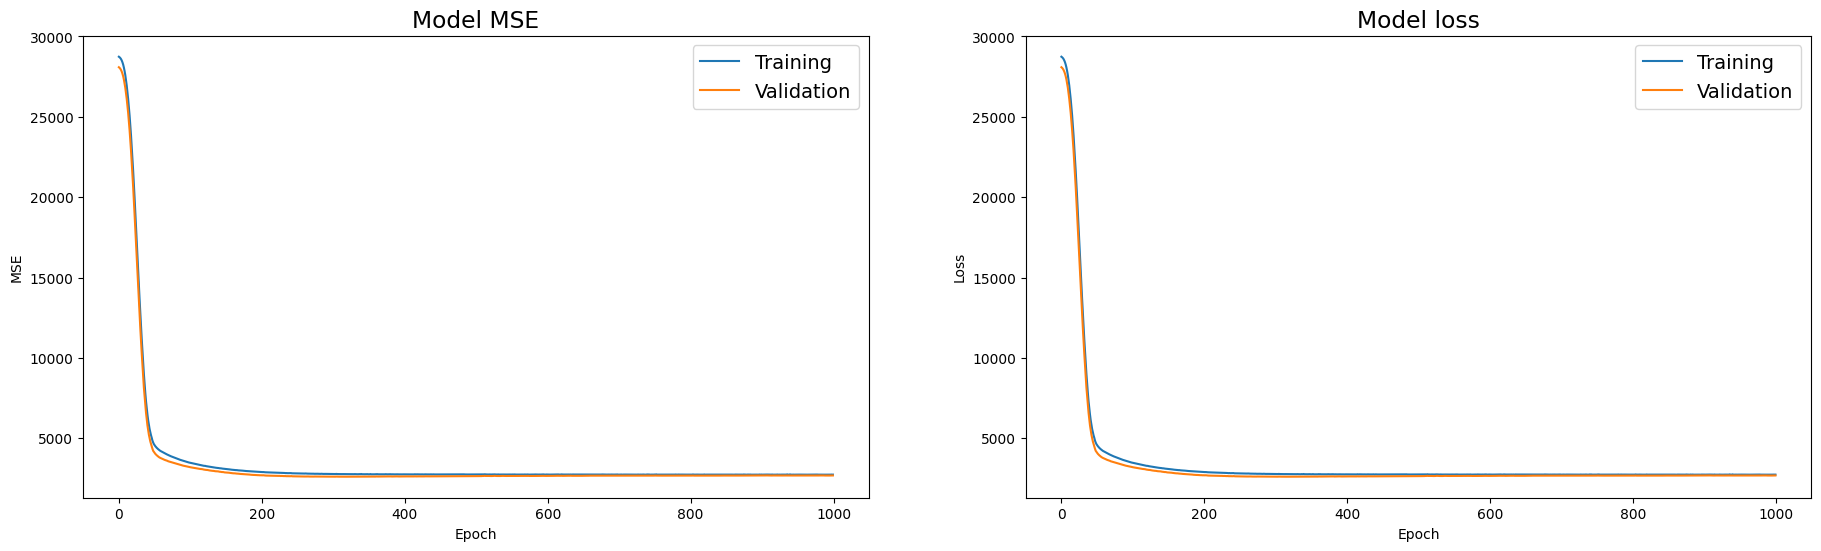

In [30]:
# insert code here
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 14})

# Plot training & validation accuracy values
ax[0].plot(history.history['mse'], label = 'Training')
ax[0].plot(history.history['val_mse'], label = 'Validation')
ax[0].set_title('Model MSE')
ax[0].set_ylabel('MSE')
ax[0].set_xlabel('Epoch')
ax[0].legend()

# Plot training & validation loss values
ax[1].plot(history.history['loss'], label = 'Training')
ax[1].plot(history.history['val_loss'], label = 'Validation')
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend()

plt.show()

### Visualisation of residuals

In [31]:
# insert code here

# Calculate R2 and adjusted R2
r2 = r2_score(y_test, predictions)
n, p = X.shape # sample size, number of explanatory variables
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

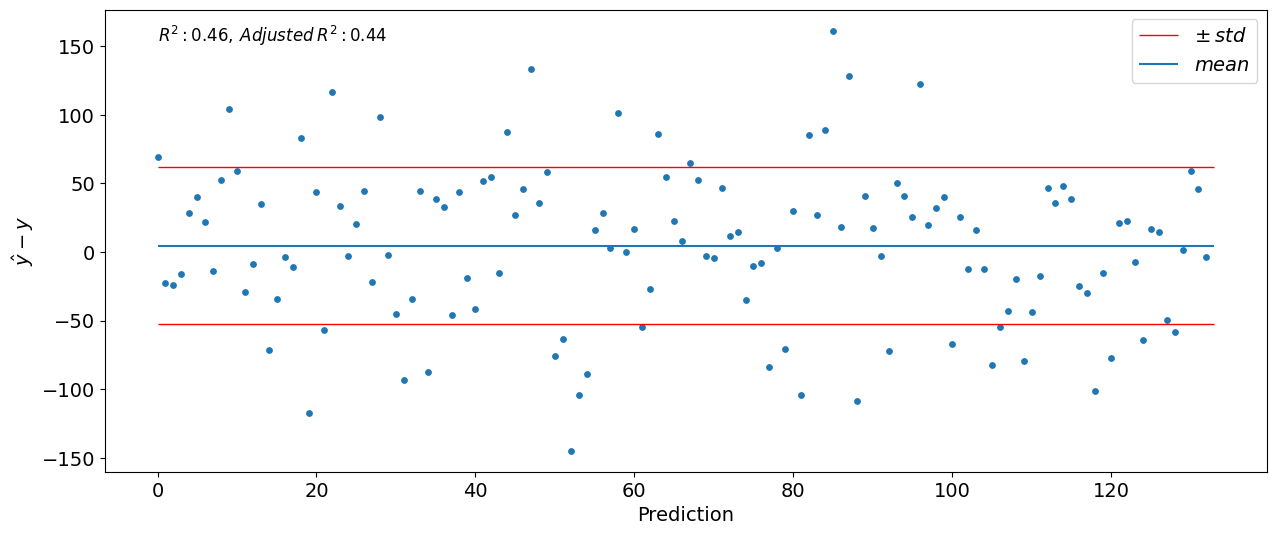

In [32]:
difference = predictions.flatten() - y_test
d_mean = difference.mean()
d_std = difference.std()
n_pred = len(predictions)
plt.figure(figsize = (15, 6))
plt.scatter(range(n_pred), difference, s = 15)
plt.hlines(d_mean + d_std, 0, n_pred, 'r', lw = 1, label = '$\pm \: std$')
plt.hlines(d_mean, 0, n_pred, label = '$mean$')
plt.hlines(d_mean - d_std, 0, n_pred, 'r', lw = 1)
plt.xlabel('Prediction')
plt.ylabel('$\hat y - y$')
plt.legend()
plt.text(0, difference.max() * 0.95,
         '$R^2: %.2f, \: Adjusted \: R^2: %.2f$' % (r2, adjusted_r2),
         fontsize = 12)
plt.show()



---



---



> > > > > > > > > © 2025 Institute of Data


---



---



